In [1]:
import numpy as np
from lampe.data import H5Dataset
import os
from pathlib import Path
from tqdm import tqdm 
import matplotlib.pyplot as plt

os.environ['SCRATCH'] = os.path.join('/scratch/users/mvasist/')
scratch = os.environ.get('SCRATCH', '')
# scratch = '/users/ricolandman/Research_data/npe_crires/'
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'

import sys
sys.path.insert(0, '/home/mvasist/Highres/')
from DataProcuring import Data

d = Data()

In [2]:
trainset = H5Dataset(datapath / 'train.h5')
validset = H5Dataset(datapath / 'valid.h5')
testset = H5Dataset(datapath / 'test.h5')


In [3]:
len(trainset), len(validset), len(testset)

(835584, 102400, 106496)

In [4]:
m = np.loadtxt('means_and_variances/spectral_mean.csv')

(array([7.9533e+05, 1.3349e+04, 7.6110e+03, 5.7550e+03, 3.8390e+03,
        2.8300e+03, 1.9450e+03, 1.4280e+03, 1.0280e+03, 8.3300e+02,
        5.7200e+02, 3.9900e+02, 2.5600e+02, 1.8300e+02, 1.0200e+02,
        6.5000e+01, 3.9000e+01, 1.0000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.04206144e-10, 1.60889783e+02, 3.21779565e+02, 4.82669348e+02,
        6.43559131e+02, 8.04448914e+02, 9.65338696e+02, 1.12622848e+03,
        1.28711826e+03, 1.44800804e+03, 1.60889783e+03, 1.76978761e+03,
        1.93067739e+03, 2.09156718e+03, 2.25245696e+03, 2.41334674e+03,
        2.57423652e+03, 2.73512631e+03, 2.89601609e+03, 3.05690587e+03,
        3.21779565e+03]),
 <BarContainer object of 20 artists>)

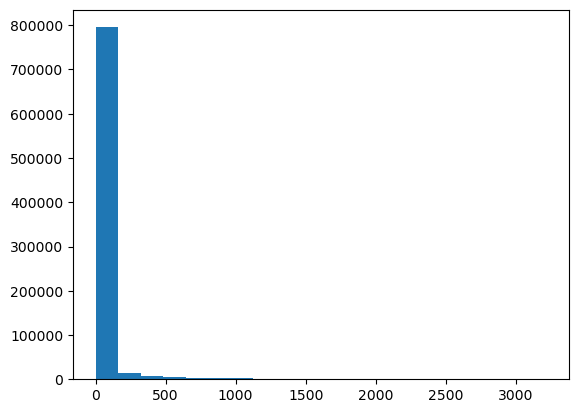

In [5]:
plt.hist(m, bins=20)

In [4]:
def computing_mean_var(sett):
    summ = 0
    sum_squares = 0
    count = len(sett)


    for th, x in sett:
        summ += x[0]
        sum_squares = sum_squares + x[0]**2

    mean_value = (summ / count)
    var_value = sum_squares/count - (mean_value**2)
    
    return mean_value, var_value

In [5]:
name = ['trainset', 'validset', 'testset']

In [6]:
for i, sett in enumerate([trainset, validset, testset]):
    mean_value, var_value = computing_mean_var(sett)
    np.savetxt('means_and_variances/mean_value_' + name[i] + '.csv', mean_value)
    np.savetxt('means_and_variances/var_value_' +  name[i] + '.csv', var_value)

In [58]:
def x_new(x, sett):
    mean_value = np.loadtxt('means_and_variances/mean_value_' + sett + '.csv')
    var_value= np.loadtxt('means_and_variances/var_value_' + sett+ '.csv')  
    return (x-mean_value)/var_value

In [ ]:
m_norm = []
for th, x in tqdm(trainset):
    m_norm.append(x_new(x[0], 'trainset').mean())
    
    
np.savetxt('means_and_variances/spectral_mean_normalized.csv', m_norm)

In [6]:
m_norm = np.loadtxt('means_and_variances/spectral_mean_normalized.csv')

(-25.0, 45.0)

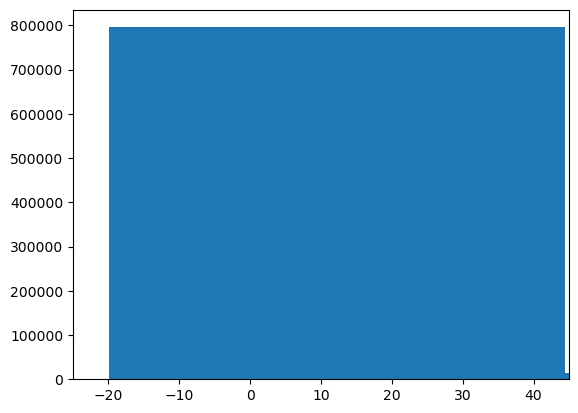

In [25]:
plt.hist(m_norm*1e4, bins= 20)
plt.xlim(-25, 45)

In [60]:
def SoftClip(x,bound):
    return x / (1 + abs(x / bound))
# scm = SoftClip(m, 100)

In [12]:
m_SoftClip = []
for th, x in trainset:
    x_ = SoftClip(x[0], 100)
    m_SoftClip.append(x_.mean())
    
np.savetxt('means_and_variances/spectral_mean_SoftClip.csv', m_SoftClip)

In [11]:
m_SoftClip = np.loadtxt('means_and_variances/spectral_mean_SoftClip.csv')

(array([269615.,  97464.,  87590.,  75787.,  63875.,  54146.,  44118.,
         35035.,  26043.,  17818.,  12017.,   8041.,   5429.,   4429.,
          4335.,   4649.,   5794.,   7406.,   7731.,   4262.]),
 array([1.04206144e-10, 4.84897041e+00, 9.69794083e+00, 1.45469112e+01,
        1.93958817e+01, 2.42448521e+01, 2.90938225e+01, 3.39427929e+01,
        3.87917633e+01, 4.36407337e+01, 4.84897041e+01, 5.33386745e+01,
        5.81876450e+01, 6.30366154e+01, 6.78855858e+01, 7.27345562e+01,
        7.75835266e+01, 8.24324970e+01, 8.72814674e+01, 9.21304379e+01,
        9.69794083e+01]),
 <BarContainer object of 20 artists>)

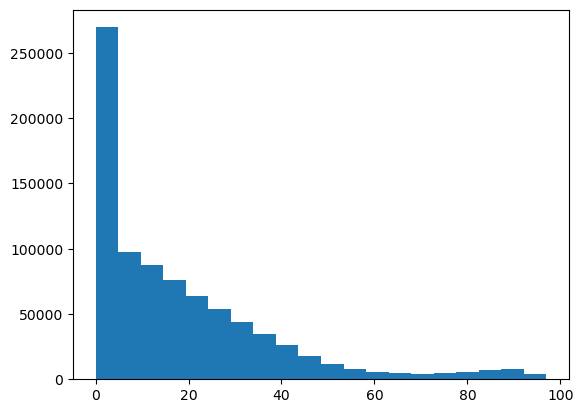

In [12]:
plt.hist(m_SoftClip, bins=20)

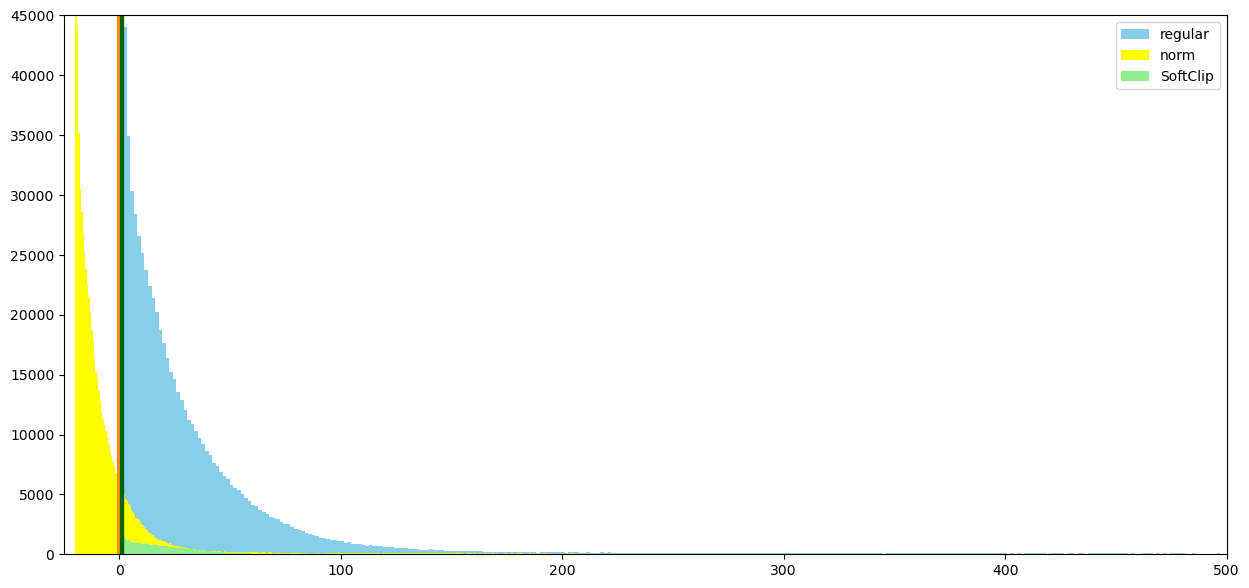

In [85]:
plt.figure(figsize=(15,7))
plt.hist(m, bins=2000, color = 'skyblue', label = 'regular')
plt.hist(m_norm*1e4, bins= 2000, color = 'yellow', label = 'norm')
plt.hist(m_SoftClip, bins=2000, color = 'lightgreen', label = 'SoftClip')
plt.xlim(-25,500)
plt.ylim(0,45000)
plt.axvline(d.flux.mean()*d.flux_scaling, c= 'blue', lw = 3)
plt.axvline(x_new(d.flux*d.flux_scaling, 'trainset').mean(), c= 'darkorange', lw = 3)
plt.axvline(SoftClip(d.flux*d.flux_scaling, 100).mean(), c= 'darkgreen', lw = 3)
plt.legend()
plt.show()

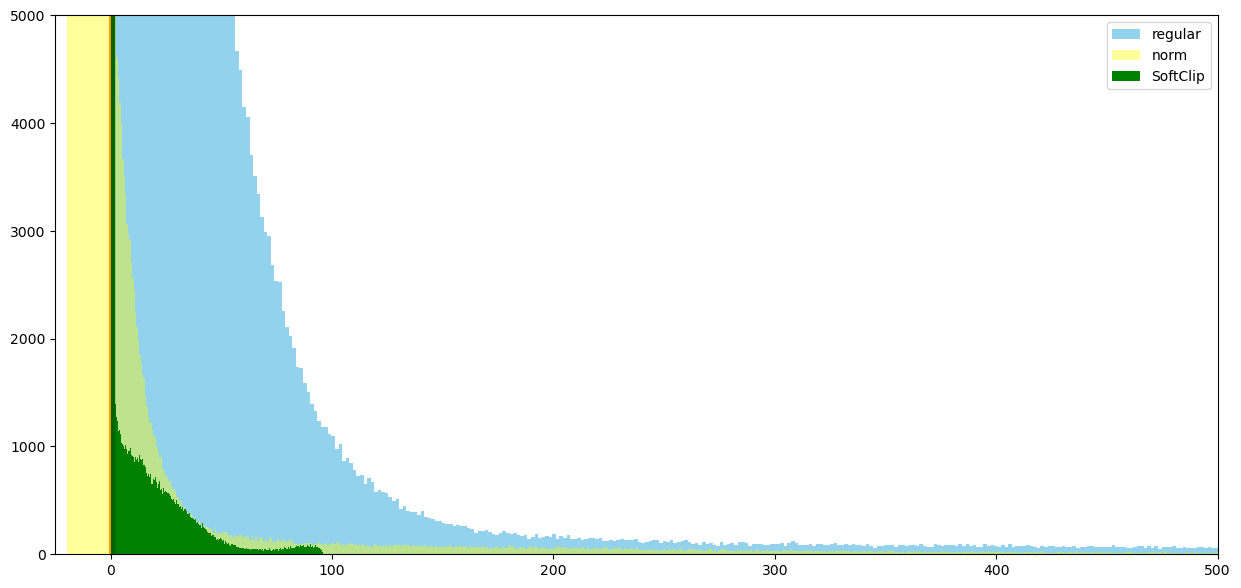

In [92]:
plt.figure(figsize=(15,7))
plt.hist(m, bins=2000, color = 'skyblue', label = 'regular', alpha = 0.9)
plt.hist(m_norm*1e4, bins= 2000, color = 'yellow', label = 'norm', alpha = 0.4)
plt.hist(m_SoftClip, bins=2000, color = 'green', label = 'SoftClip', alpha = 1)
plt.xlim(-25,500)
plt.ylim(0,5000)
plt.axvline(d.flux.mean()*d.flux_scaling, c= 'blue', lw = 3)
plt.axvline(x_new(d.flux.mean()*d.flux_scaling, 'trainset').mean(), c= 'orange', lw = 3)
plt.axvline(SoftClip(d.flux*d.flux_scaling, 100).mean(), c= 'darkgreen', lw = 3)
plt.legend()
plt.show()

/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


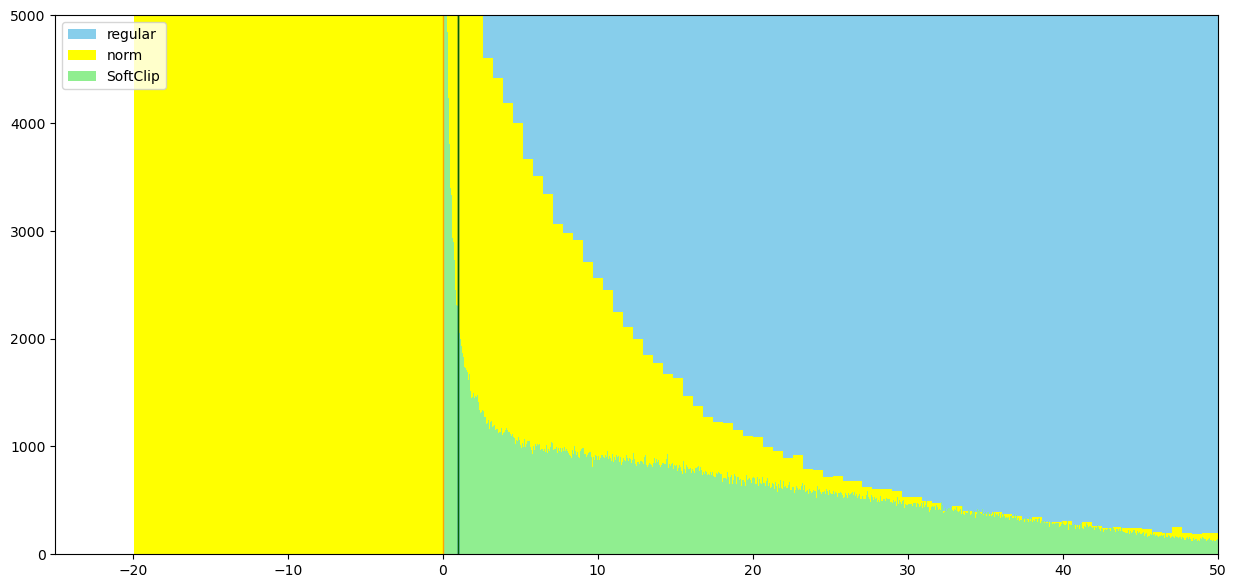

In [88]:
plt.figure(figsize=(15,7))
plt.hist(m, bins=2000, color = 'skyblue', label = 'regular')
plt.hist(m_norm*1e4, bins= 2000, color = 'yellow', label = 'norm')
plt.hist(m_SoftClip, bins=2000, color = 'lightgreen', label = 'SoftClip')
plt.xlim(-25,50)
plt.ylim(0,5000)
plt.axvline(d.flux.mean()*d.flux_scaling, c= 'blue', lw = 1)
plt.axvline(x_new(d.flux.mean()*d.flux_scaling, 'trainset').mean(), c= 'orange', lw = 1)
plt.axvline(SoftClip(d.flux*d.flux_scaling, 100).mean(), c= 'darkgreen', lw = 1)
plt.legend()
plt.show()

/tmp/ipykernel_3912908/2527588791.py:3: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(m_norm*1e4), bins= 20, color = 'orange', alpha = 1, label = 'Norm')


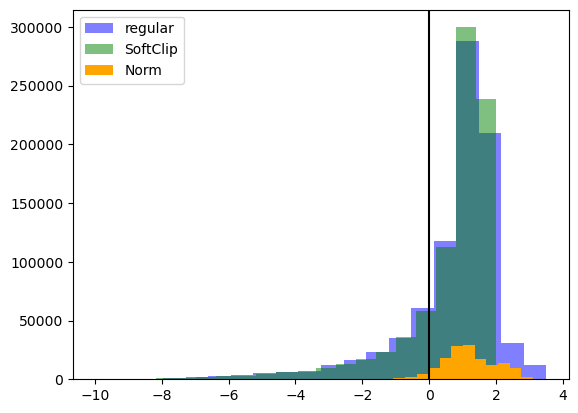

In [42]:
plt.figure()
plt.hist(np.log10(m), bins=20, color = 'blue', alpha = 0.5, label = 'regular')
plt.hist(np.log10(m_SoftClip), bins=20, color = 'green', alpha = 0.5, label = 'SoftClip')
plt.hist(np.log10(m_norm*1e4), bins= 20, color = 'orange', alpha = 1, label = 'Norm')
plt.axvline(np.log10(d.flux.mean()*d.flux_scaling), c= 'black')
plt.legend()
plt.show()

In [80]:
SoftClip(d.flux*d.flux_scaling, 100).mean(), d.flux.mean()*d.flux_scaling, x_new(d.flux*d.flux_scaling,'trainset').mean()

(0.989941474313676, 1.0, -0.0019492282219599436)

In [14]:
def x_norm(x, sett):
    mean_value = np.loadtxt('means_and_variances/mean_value_' + sett + '.csv')
    var_value= np.loadtxt('means_and_variances/var_value_' + sett+ '.csv')  
    return (x-torch.Tensor(mean_value))/torch.Tensor(var_value)

In [6]:
def noisy(x):
    print(x.size(), np.shape(Data().err))
    data_uncertainty = Data().err * Data().flux_scaling*160 #50 is 10% of the median of the means of spectra in the training set.
    x = x + torch.from_numpy(data_uncertainty) * torch.randn_like(x)
    # x[:,0, :] = x[:,0, :] + torch.from_numpy(data_uncertainty) * torch.randn(x[:,0,:].size())
    return x

In [16]:
def pipe(theta, x, name): # -> Tensor
    x = noisy(x)        
    # x = torch.hstack((x[:, 0, :], x[:,1,:]))
    x = x_norm(x, name)
    theta, x = theta.cuda(), x.cuda()
    return theta, x
#     return loss(theta, x)

In [ ]:
import torch
trainset = H5Dataset(datapath / 'train.h5', batch_size=16, shuffle=True)

for theta, x in trainset:
    print(theta.size(), x.size(),  x[:,0].size())
    pipe(theta.float(), x[:,0].float(), 'trainset')

In [7]:
x

tensor([[ 0.1258,  0.1257,  0.1257,  ...,  0.1367,  0.1368,  0.1368],
        [-0.5117, -0.5115, -0.5114,  ...,  0.4880,  0.4882,  0.4883]])

In [20]:
import torch
from torch import Tensor

# a= torch.randn((16, 2, 6144))
# b = torch.randn((16, 19))

trainset = H5Dataset(datapath / 'train.h5', batch_size=16, shuffle=True)

for th, x in trainset: 
    print(th.size(), x.size())
    break
    
pipe(th.float(), x[:,0].float(), 'trainset')

torch.Size([16, 19]) torch.Size([16, 2, 6144])
torch.Size([16, 6144]) (6144,)


(tensor([[ 1.1966e-01,  6.8794e-01,  8.4201e-02,  1.7135e-01,  4.2046e-02,
           1.5984e-02,  6.0549e-05,  6.2080e-01,  7.3370e-01,  1.6139e-01,
           7.0526e-01,  8.1150e-01,  9.0173e-01,  2.5685e-01,  1.3524e-01,
           4.1897e-02,  5.0071e-01,  5.8335e-01,  1.5795e-01],
         [ 6.4484e-01,  1.0371e-01,  9.0237e-01,  8.9785e-01,  6.1041e-01,
           3.1882e-01,  2.4957e-01,  2.4915e-01,  6.7613e-01,  3.8758e-01,
           7.9022e-01,  8.3296e-01,  2.0001e-01,  4.5703e-01,  9.8285e-01,
           8.0153e-01,  5.3367e-01,  7.7540e-01,  4.8676e-01],
         [ 2.8566e-01,  1.7933e-01,  7.2121e-01,  8.5524e-01,  5.0772e-01,
           2.1026e-01,  1.5681e-01,  4.3711e-01,  6.1039e-01,  1.6343e-01,
           6.5630e-01,  5.5075e-01,  9.4128e-04,  6.3710e-01,  1.1239e-01,
           9.7393e-01,  5.9118e-01,  4.9782e-01,  4.0418e-01],
         [ 5.2530e-01,  4.0900e-01,  5.8853e-01,  1.7635e-01,  1.2101e-01,
           3.2228e-02, -1.4153e-02,  4.3159e-01,  4.6438e-01,